# MapAI Dataset

## Imports

In [1]:
import os

from datasets import load_dataset
import cv2 as cv
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

C:\Users\erikf\anaconda3\envs\tf\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Download Dataset

In [2]:
dataset = load_dataset("sjyhne/mapai_dataset")

Using custom data configuration sjyhne--mapai_dataset-a29285241f23b7c3
Found cached dataset parquet (C:/Users/erikf/.cache/huggingface/datasets/sjyhne___parquet/sjyhne--mapai_dataset-a29285241f23b7c3/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.97it/s]


In [3]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['image', 'lidar', 'mask', 'filename'],
        num_rows: 7000
    })
    validation: Dataset({
        features: ['image', 'lidar', 'mask', 'filename'],
        num_rows: 1500
    })
    task2_test: Dataset({
        features: ['image', 'lidar', 'mask', 'filename'],
        num_rows: 978
    })
    task1_test: Dataset({
        features: ['image', 'lidar', 'mask', 'filename'],
        num_rows: 1368
    })
})


## Unpack images, labels and LiDAR and store them in data folder

In [4]:
# Create dataset folder if it doesnt exist
dataset_path = os.path.normpath("dataset")
if not os.path.exists(dataset_path):
    os.makedirs(dataset_path)

# Create MapAI folder if it doesnt exist
dataset_path = os.path.normpath("dataset\\MapAI")
if not os.path.exists(dataset_path):
    os.makedirs(dataset_path)
    
# Iterate through MapAI_dataset
for set_name in dataset.keys():
    # Create subfolder if it doesnt exist
    subfolder_path = os.path.normpath("dataset\\MapAI\\" + set_name)
    if not os.path.exists(subfolder_path):
        os.makedirs(subfolder_path)
    
    # Create subsubfolders if they doesnt exit
    subsubfolders = ["image", "mask", "lidar"]
    for folder_name in subsubfolders:
        subsubfolder_path = os.path.normpath("dataset\\MapAI\\" + set_name + "\\" + folder_name)
        if not os.path.exists(subsubfolder_path):
            os.makedirs(subsubfolder_path)
    
    # Access data
    image_files = dataset[set_name]["image"]
    mask_files = dataset[set_name]["mask"]
    lidar_files = dataset[set_name]["lidar"]
    filename_files = dataset[set_name]["filename"]
    
    for x in range(len(filename_files)):
        # Remove file extension from filename
        filename = filename_files[x].split(".")[0]
        
        # Save RGB aerial image in image folder
        image_files[x].save(os.path.normpath("dataset\\MapAI\\" + set_name + "\\image\\" + filename + ".PNG"))
        
        # Save Greyscale mask image in mask folder
        mask_array = np.asarray(mask_files[x])
        mask_im = Image.fromarray(mask_array*255) # Multiply pixels by 255: [0, 1] -> [0, 255]
        mask_im.save(os.path.normpath("dataset\\MapAI\\" + set_name + "\\mask\\" + filename + ".PNG"))
        
        # Save floating point LiDAR data in lidar folder as a numpy file
        lidar_array = np.asarray(lidar_files[x])
        np.save(os.path.normpath("dataset\\MapAI\\" + set_name + "\\lidar\\" + filename), lidar_array)
        

## Display some images from the dataset

In [65]:
# function that displays aerial image, lidar and ground truths
def display_dataset(set_name, data_name):
    path = os.path.normpath("dataset\\MapAI\\" + set_name)
    # Define plot
    plt.figure(figsize=(20,20))
    plt.suptitle("Set: " + set_name + " - Data: " + data_name, fontsize=18)
    plt.subplots_adjust(top=1.55)
    
    # Find and display aerial image
    plt.subplot(131)
    plt.title('Aerial Image')
    aerial_img = cv.imread(os.path.normpath(path + "\\image\\" + data_name + ".PNG"))
    aerial_img = cv.cvtColor(aerial_img, cv.COLOR_BGR2RGB)
    plt.imshow(aerial_img)
    
    # Find and display lidar image
    plt.subplot(132)
    plt.title('LiDAR Image')
    lidar_img = np.load(os.path.normpath(path + "\\lidar\\" + data_name + ".npy"))
    plt.imshow(lidar_img, cmap='gray')
    
    # Find and display ground truth image
    plt.subplot(133)
    plt.title('Ground Truth Image')
    mask_img = cv.imread(os.path.normpath(path + "\\mask\\" + data_name + ".PNG"))
    plt.imshow(mask_img, cmap='gray')
    
    plt.show()
    

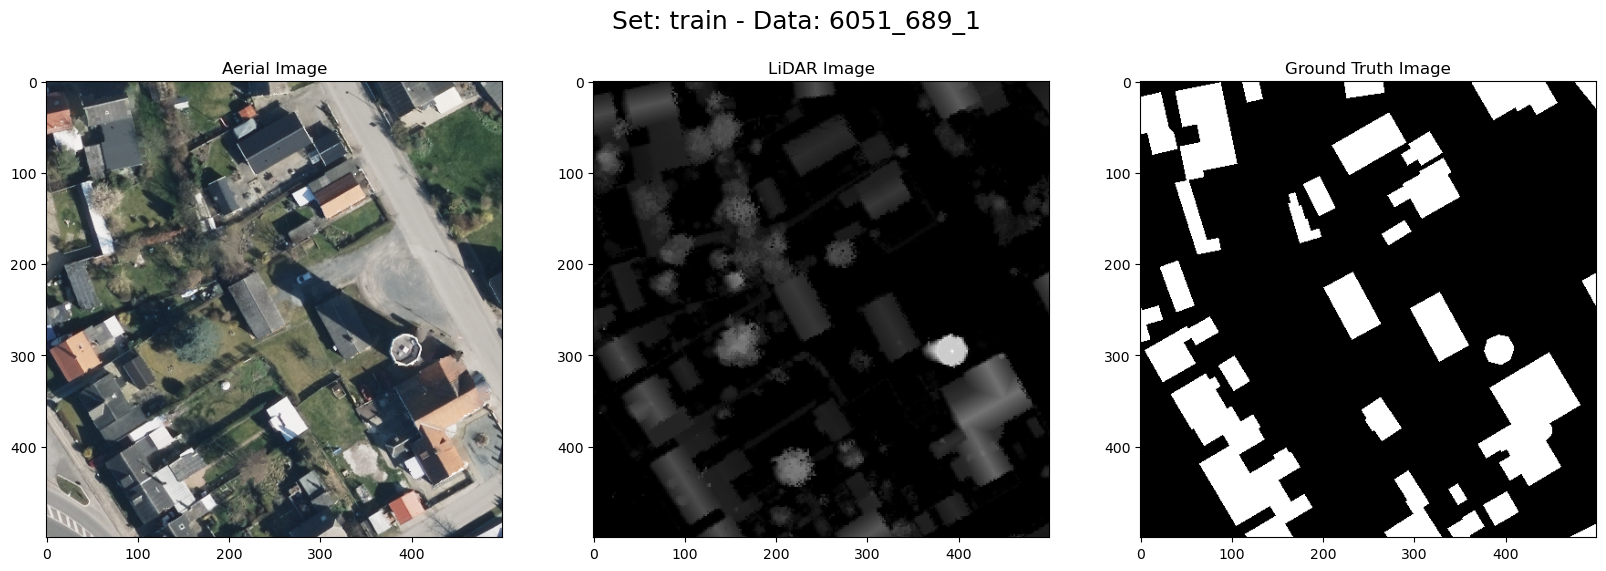

In [70]:
display_dataset("train", "6051_689_1")